# Example Usage of Pandas, Seaborn, SciPy, and Matplotlib

This notebook demonstrates basic usage of four key Python libraries for data analysis and visualization within a Poetry-managed Jupyter environment.

- **Pandas:** Data manipulation and analysis.
- **Seaborn:** Statistical data visualization (built on Matplotlib).
- **SciPy:** Scientific and technical computing (we'll use a statistical function).
- **Matplotlib:** Fundamental plotting library.


In [2]:
# %%
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Set a style for plots
sns.set_theme(style="whitegrid")

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Creating a Dummy Dataset with Pandas

We'll create a simple DataFrame with random data to simulate a dataset.


In [3]:
# %%
# Set a seed for reproducibility
np.random.seed(42)

# Create dummy data
n_samples = 100
data = {
    'Feature1': np.random.rand(n_samples) * 100, # Random numbers between 0 and 100
    'Feature2': np.random.randn(n_samples) * 20 + 50, # Random numbers from a normal distribution
    'Category': np.random.choice(['Group A', 'Group B', 'Group C'], n_samples), # Categorical data
    'Value': np.random.randint(1, 500, n_samples) # Integer values
}

# Create a Pandas DataFrame
df = pd.DataFrame(data)

# Display the first few rows
print("Dummy DataFrame created:")
display(df.head()) # Using display() is common in notebooks for better formatting

# Display basic information about the DataFrame
print("\nDataFrame Info:")
df.info()

# Display descriptive statistics
print("\nDescriptive Statistics:")
display(df.describe())


Dummy DataFrame created:


,Feature1,Feature2,Category,Value
0,37.454012,51.740941,Group B,103
1,95.071431,44.019853,Group A,196
2,73.199394,51.835216,Group B,262
3,59.865848,10.248622,Group A,365
4,15.601864,45.606562,Group C,480



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  100 non-null    float64
 1   Feature2  100 non-null    float64
 2   Category  100 non-null    object 
 3   Value     100 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.3+ KB

Descriptive Statistics:


,Feature1,Feature2,Value
count,100.000000,100.000000,100.000000
mean,47.018074,49.978393,247.950000
std,29.748941,18.258587,138.873416
min,0.552212,10.248622,1.000000
25%,19.320076,35.897447,123.500000
50%,46.414245,51.556100,246.500000
75%,73.020312,59.673831,359.000000
max,98.688694,99.264842,497.000000


## 2. Basic Data Manipulation with Pandas

Let's do a couple of simple operations on the DataFrame.


In [4]:
# %%
# Filter data: Select rows where Category is 'Group A'
group_a_df = df[df['Category'] == 'Group A'].copy() # Use .copy() to avoid SettingWithCopyWarning
print("\nData for 'Group A':")
display(group_a_df.head())

# Group by Category and calculate the mean of Feature1
mean_feature1_by_category = df.groupby('Category')['Feature1'].mean()
print("\nMean of Feature1 by Category:")
display(mean_feature1_by_category)



Data for 'Group A':


,Feature1,Feature2,Category,Value
1,95.071431,44.019853,Group A,196
3,59.865848,10.248622,Group A,365
5,15.599452,57.142251,Group A,372
6,5.808361,79.557881,Group A,350
7,86.617615,39.634596,Group A,47



Mean of Feature1 by Category:


Category
Group A    43.685335
Group B    55.762144
Group C    40.185639
Name: Feature1, dtype: float64

## 3. Statistical Analysis with SciPy

We'll use SciPy to perform a simple independent samples t-test to see if there's a significant difference in `Feature1` between 'Group A' and 'Group B'.


In [5]:
# %%
# Extract Feature1 data for Group A and Group B
feature1_group_a = df[df['Category'] == 'Group A']['Feature1']
feature1_group_b = df[df['Category'] == 'Group B']['Feature1']

# Perform independent t-test
# We assume equal variance here (equal_var=True), though you might test this assumption in a real analysis
t_statistic, p_value = stats.ttest_ind(feature1_group_a, feature1_group_b, equal_var=True)

print(f"Independent t-test results for Feature1 between Group A and Group B:")
print(f"  T-statistic: {t_statistic:.4f}")
print(f"  P-value: {p_value:.4f}")

# Interpret the p-value (common significance level is 0.05)
alpha = 0.05
if p_value < alpha:
    print("\nInterpretation: The difference in mean Feature1 between Group A and Group B is statistically significant (p < 0.05).")
else:
    print("\nInterpretation: The difference in mean Feature1 between Group A and Group B is NOT statistically significant (p >= 0.05).")


Independent t-test results for Feature1 between Group A and Group B:
  T-statistic: -1.6605
  P-value: 0.1013

Interpretation: The difference in mean Feature1 between Group A and Group B is NOT statistically significant (p >= 0.05).


## 4. Data Visualization with Seaborn and Matplotlib

Let's create some plots to visualize the data. Seaborn makes creating attractive statistical plots easy, and Matplotlib provides the underlying customization capabilities.


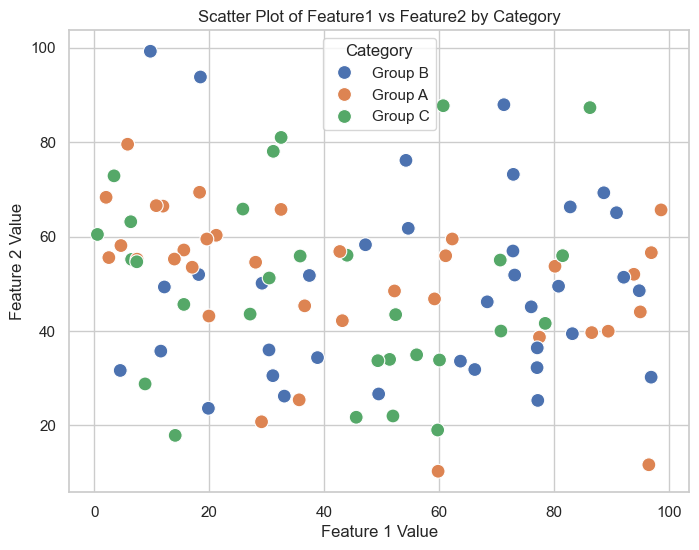

In [6]:
# %%
# Scatter plot using Seaborn
plt.figure(figsize=(8, 6)) # Use Matplotlib to set the figure size
sns.scatterplot(data=df, x='Feature1', y='Feature2', hue='Category', s=100) # s controls dot size

# Add title and labels using Matplotlib
plt.title('Scatter Plot of Feature1 vs Feature2 by Category')
plt.xlabel('Feature 1 Value')
plt.ylabel('Feature 2 Value')

plt.show() # Display the plot


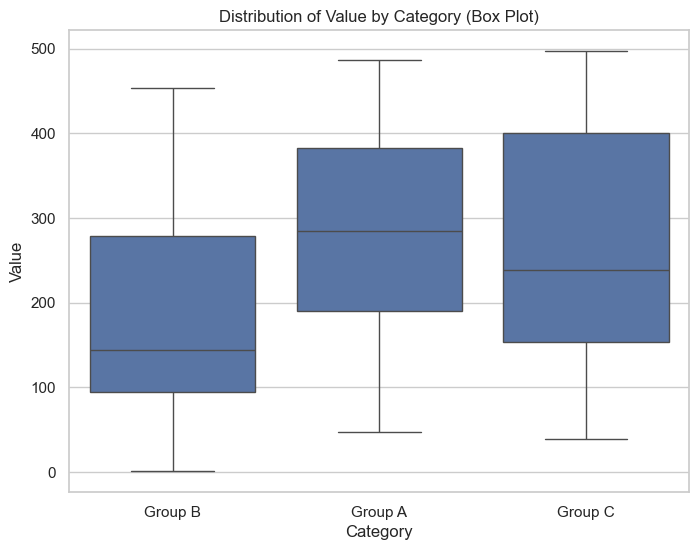

In [7]:
# %%
# Box plot using Seaborn to show distribution of Value by Category
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Category', y='Value')

# Add title and labels using Matplotlib
plt.title('Distribution of Value by Category (Box Plot)')
plt.xlabel('Category')
plt.ylabel('Value')

plt.show()


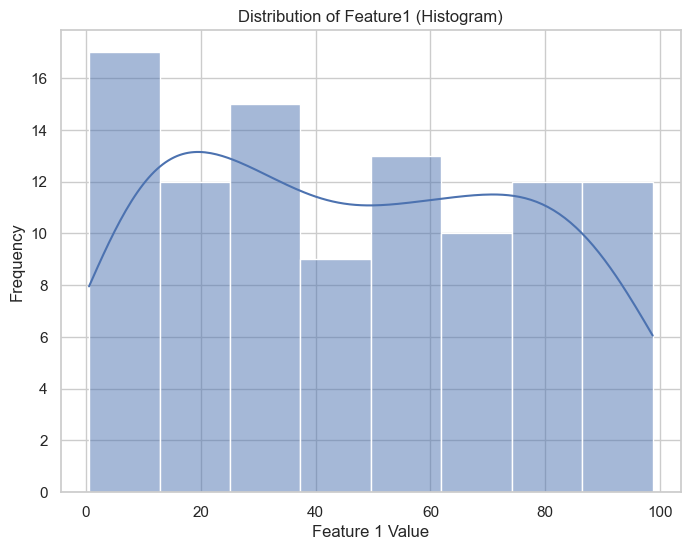

In [8]:
# %%
# Histogram using Seaborn to show distribution of Feature1
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Feature1', kde=True) # kde=True adds a kernel density estimate line

# Add title and labels using Matplotlib
plt.title('Distribution of Feature1 (Histogram)')
plt.xlabel('Feature 1 Value')
plt.ylabel('Frequency')

plt.show()
